In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fetch all data from the directory
directory = "../data/json_dump"
data = []
for file in os.listdir(directory):
    jsonObj = pd.read_json(os.path.join(directory, file), lines=True)
    data.append(jsonObj)
data = pd.concat(data)


In [3]:
# reduce data to unique cpc ids
y02count={}
arr_count={}
for index, row in data.iterrows():
    arr_y02_truncated=set()
    flag=0
    if type(row['cpc_id'])==list or type(row['cpc_id'])==set :
        for j in row['cpc_id']:
            if j.startswith("Y02"):
                arr_y02_truncated.add(j.split()[0])
    else:
        if j.startswith("Y02"):
            arr_y02_truncated.add(j.split()[0])
    row['cpc_id']=arr_y02_truncated
    for k in arr_y02_truncated:      
        y02count[k]=y02count.get(k,0)+1
    arr_count[len(arr_y02_truncated)]=arr_count.get(len(arr_y02_truncated),0)+1
    

In [4]:
def plots(dict):
    labels = list(dict.keys())
    count = list(dict.values())
    fig = plt.figure(figsize = (8, 4))
    # creating the bar plot
    plt.bar(labels, count)
    plt.xlabel("Labels")
    plt.ylabel("Count of Documents")
    plt.title("Y02 Distribution")
    plt.show()

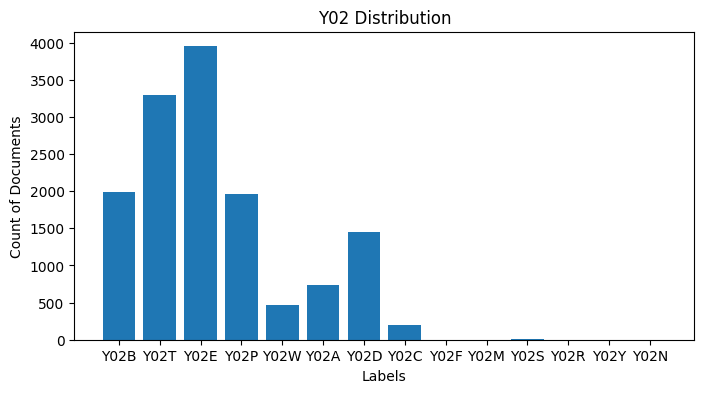

In [5]:
plots(y02count)

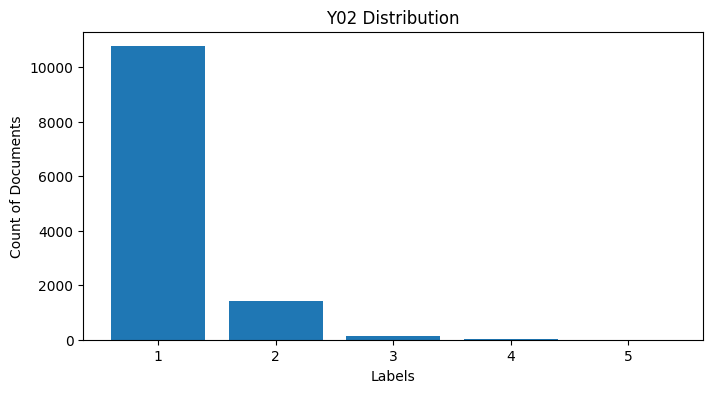

In [6]:
plots(arr_count)
# wedgeprops = {'width':1}
# plt.pie(arr_count.values(),radius=1,wedgeprops = wedgeprops,)
# plt.legend(title = "Number of labels per document",labels = arr_count.keys(),loc="best", fontsize=10)
# fig = plt.figure(figsize = (8, 4))



In [7]:
y02count_sorted= sorted(y02count.items(), key=lambda x: x[1], reverse=True)
import pprint
pp = pprint.PrettyPrinter(depth=4)
pp.pprint(y02count_sorted)

[('Y02E', 3948),
 ('Y02T', 3293),
 ('Y02B', 1990),
 ('Y02P', 1967),
 ('Y02D', 1447),
 ('Y02A', 740),
 ('Y02W', 472),
 ('Y02C', 195),
 ('Y02S', 3),
 ('Y02F', 2),
 ('Y02M', 2),
 ('Y02R', 1),
 ('Y02Y', 1),
 ('Y02N', 1)]


In [14]:
print(arr_count)
print(sum(arr_count.values())-arr_count[1])

{1: 10769, 2: 1407, 3: 140, 4: 11, 5: 3}
1561


{'Y02B': 1567, 'Y02T': 2787, 'Y02E': 2814, 'Y02P': 1279, 'Y02W': 332, 'Y02A': 508, 'Y02D': 1350, 'Y02C': 129, 'Y02F': 1, 'Y02Y': 1, 'Y02N': 1}


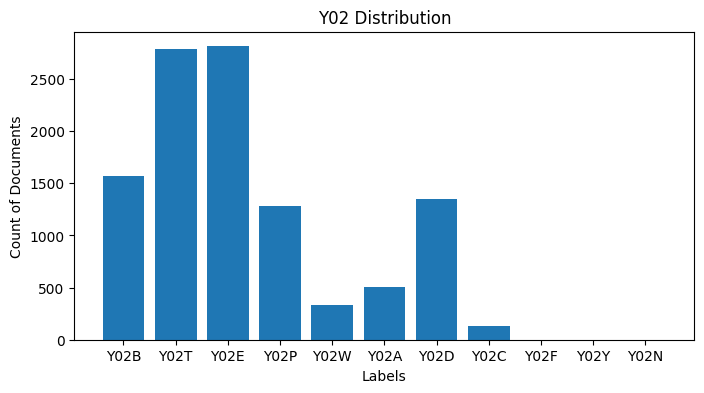

In [9]:
# For docs with one label: plots:
# reduce data to unique cpc ids
dict_count_1={}
for index, row in data.iterrows():
    if len(row['cpc_id'])==1:
        for e in row['cpc_id']:
            break
        dict_count_1[e]=dict_count_1.get(e,0)+1
    
print(dict_count_1)
plots(dict_count_1)

In [15]:
counte=0
countt=0
countet=0
for i in data['cpc_id']:
    if len(i)>=2:
        if 'Y02E' in i:
            counte=counte+1
        if 'Y02T' in i:
            countt=countt+1
        if 'Y02E' in i and 'Y02T' in i:
            # print(i)
            countet=countet+1
        
print(counte)
print(countt)
print(countet)

1134
506
392


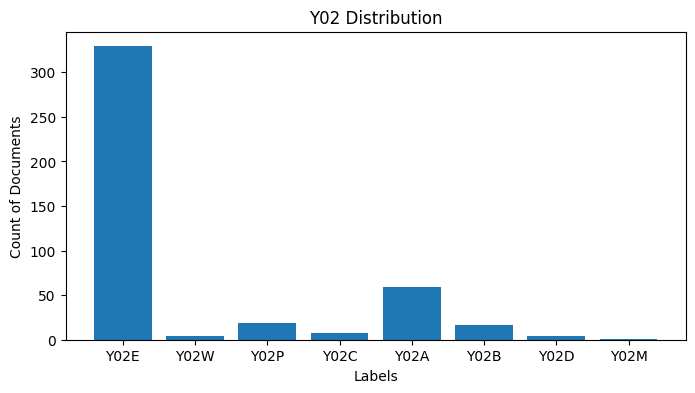

In [11]:
count=0
dict_count_2={}
for i in data['cpc_id']:
    if len(i)==2:
        count=count+1
        if 'Y02T' in i:
            for e in i:
                if (e!='Y02T'):break
            dict_count_2[e]=dict_count_2.get(e,0)+1

    
plots(dict_count_2) 

{'Y02P': 425, 'Y02T': 329, 'Y02B': 187, 'Y02W': 28, 'Y02A': 19, 'Y02C': 10, 'Y02D': 4, 'Y02S': 1}


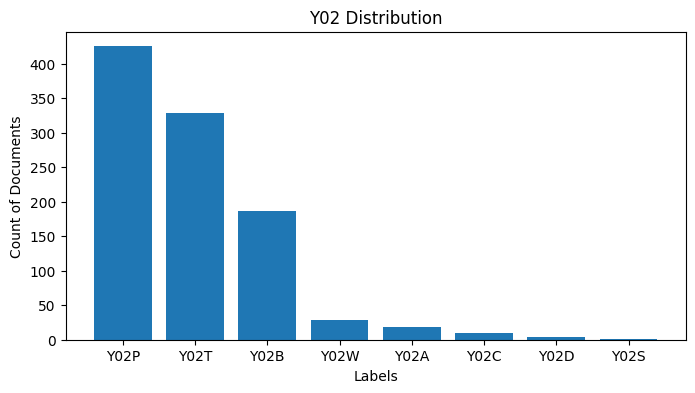

In [12]:
count=0
dict_count_2={}
for i in data['cpc_id']:
    if len(i)==2:
        count=count+1
        if 'Y02E' in i:
            for e in i:
                if e!='Y02E':break
            dict_count_2[e]=dict_count_2.get(e,0)+1

print(dict_count_2) 
plots(dict_count_2) 

367


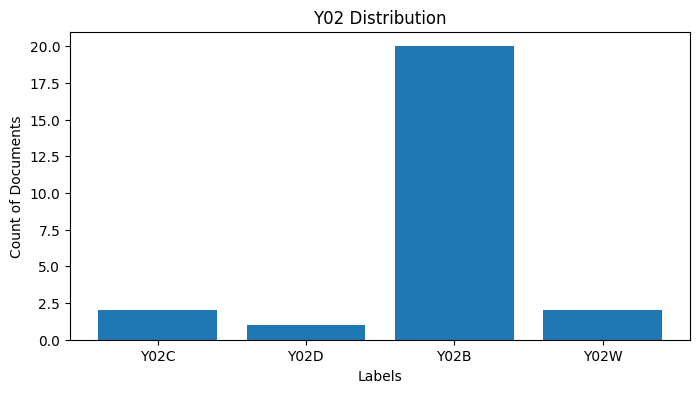

In [13]:
count=0
dict_count_2={}
for i in data['cpc_id']:
    if len(i)>=2:
        if 'Y02T' in i and 'Y02E' in i:
                c=len(i)
                c1=0
                for e in i:
                    c1=c1+1
                    if (e!='Y02T' and e!='Y02E'):break
                if(c1==c): count=count+1

                else:
                    dict_count_2[e]=dict_count_2.get(e,0)+1

print(count) 
plots(dict_count_2) 